In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv('sleep.csv')

In [3]:
df.sample(15)

,Start,End,Time Zone,Duration,Restful Minutes,Restless Minutes,Awake Minutes
655,2021-07-19 10:52 PM,2021-07-20 5:33 AM,CDT,401,393,6,2
265,2022-09-24 11:47 PM,2022-09-25 7:29 AM,CDT,462,446,16,0
629,2021-08-16 10:49 PM,2021-08-17 5:58 AM,CDT,429,416,11,1
400,2022-04-22 10:25 PM,2022-04-23 6:14 AM,CDT,469,451,14,4
149,2023-01-21 11:18 PM,2023-01-22 7:45 AM,CDT,507,489,18,0
558,2021-11-14 10:30 PM,2021-11-15 6:30 AM,CDT,480,451,29,1
362,2022-05-31 11:59 PM,2022-06-01 5:57 AM,CDT,358,349,9,0
13,2023-06-14 11:30 PM,2023-06-15 6:07 AM,CDT,397,232,0,8
456,2022-02-26 10:00 PM,2022-02-27 5:42 AM,CDT,462,449,13,0
465,2022-02-16 10:26 PM,2022-02-17 5:55 AM,CDT,449,438,11,0


In [4]:
df.describe()

,Duration,Restful Minutes,Restless Minutes,Awake Minutes
count,1185.000000,1185.000000,1185.000000,1185.000000
mean,426.836287,384.337553,12.983966,5.434599
std,78.969676,95.047405,11.687322,8.774636
min,86.000000,0.000000,0.000000,0.000000
25%,387.000000,341.000000,8.000000,0.000000
50%,418.000000,394.000000,12.000000,2.000000
75%,453.000000,432.000000,16.000000,7.000000
max,963.000000,884.000000,121.000000,84.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Start              1185 non-null   object
 1   End                1185 non-null   object
 2   Duration           1185 non-null   int64 
 3   Restful Minutes    1185 non-null   int64 
 4    Restless Minutes  1185 non-null   int64 
 5    Awake Minutes     1185 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 55.7+ KB


No need for time zone, I'll drop that column

In [5]:
df.drop("Time Zone", axis=1, inplace = True)
df.head()

,Start,End,Duration,Restful Minutes,Restless Minutes,Awake Minutes
0,2023-06-27 11:39 PM,2023-06-28 6:07 AM,388,216,0,6
1,2023-06-26 11:50 PM,2023-06-27 6:07 AM,376,230,0,6
2,2023-06-25 11:04 PM,2023-06-26 6:07 AM,423,216,0,14
3,2023-06-25 12:12 AM,2023-06-25 9:00 AM,528,505,22,1
4,2023-06-23 11:09 PM,2023-06-24 6:47 AM,458,441,15,2


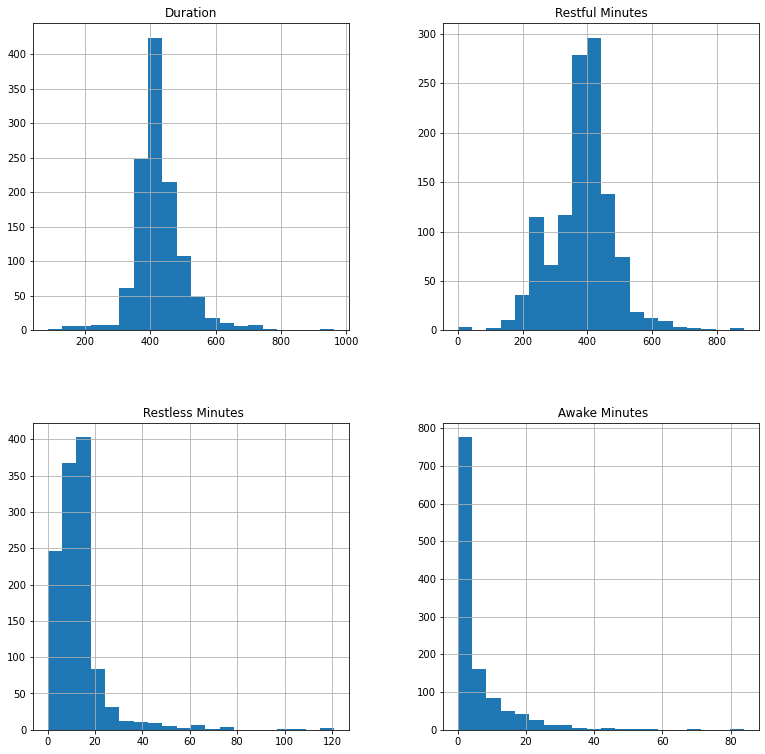

In [14]:
# Histograms of dataset
df.hist(figsize=(13,13), bins = 20);

It looks like I'm in bed for 426 minutes (7.1 hours) on average, and on average I get 384 minutes (6.4 hours) of restful sleep. To get more insights, I'm going to split the `Start` and `End` columns into `Start Time` / `Start Date` and `End Time` / `End Date`